# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline
import supereeg as se
import numpy as np

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simulate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

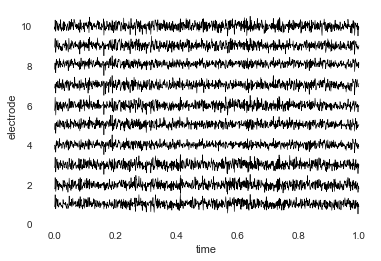

In [2]:
# simulate some data
bo_data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10)

# plot it
bo_data.plot_data()

# get just data
data = bo_data.get_data()

We'll also simulate some electrode locations

In [3]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0 -46  23  48
1 -40  33 -32
2 -30 -18 -10
3 -26  36  16
4 -19 -41  -6
5 -12  -4  -6
6  13  25 -17
7  35   2  43
8  40  49   0
9  48 -46  38


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [4]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [5]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10.]
Sample Rate in Hz: [100]
Number of sessions: 1
Date created: Thu Mar  8 10:56:54 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [6]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Thu Mar  8 10:56:54 2018
Meta data: {}


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [7]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Thu Mar  8 10:56:54 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# Initialize brain objects

Brain objects can be initialized by passing a brain object (ending in `.bo`), but can also be initialized with a model object or nifti object by specifying `return_type` as `bo` in the load function.  

For example, you can load a nifti object as a brain object: 

In [8]:
se.load('example_nifti', return_type='bo')

# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [9]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.702034,-0.992666,-0.644410,-1.607798,-1.524541,-1.065550,-1.116665,-1.591246,-0.404542,-0.140400
1,-0.085758,-0.974646,-0.211045,-0.132190,-0.124080,-0.508903,-0.468431,0.119664,0.456977,-0.665062
2,2.209443,1.840279,1.576343,-0.403054,0.304193,1.677654,0.260942,0.249796,1.645982,1.272386
3,-0.731762,-0.786150,-0.636792,-0.792549,-0.770655,-0.522944,-0.293108,-0.737737,-0.803910,-0.326249
4,-1.153748,-1.637797,-1.539774,-2.591145,-2.558621,-1.976365,-2.757618,-2.559555,-1.568853,-1.048032


or returned as a numpy array using the `get_data` method:

In [10]:
bo.get_data()

array([[-0.70203437, -0.99266585, -0.64441029, ..., -1.59124583,
        -0.40454243, -0.14039993],
       [-0.0857576 , -0.97464641, -0.21104491, ...,  0.11966383,
         0.45697728, -0.66506186],
       [ 2.20944341,  1.84027888,  1.57634276, ...,  0.24979567,
         1.64598178,  1.27238557],
       ...,
       [ 0.04595604, -0.7209977 ,  0.18838696, ...,  0.49684181,
        -0.45478825,  0.03612949],
       [-0.15925689, -0.28526861, -0.69684313, ..., -1.183676  ,
        -0.60425964, -0.6211386 ],
       [-0.64415099, -0.96915157,  0.05306565, ...,  0.34034583,
         0.00270552, -0.27373486]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [11]:
bo.locs.head()

,x,y,z
0,-46,23,48
1,-40,33,-32
2,-30,-18,-10
3,-26,36,16
4,-19,-41,-6


In [12]:
bo.get_locs()

array([[-46,  23,  48],
       [-40,  33, -32],
       [-30, -18, -10],
       [-26,  36,  16],
       [-19, -41,  -6],
       [-12,  -4,  -6],
       [ 13,  25, -17],
       [ 35,   2,  43],
       [ 40,  49,   0],
       [ 48, -46,  38]])

You can also pass a list of indices for either `times` or `locs` and return a subset of the brain object

In [13]:
bo_s = bo.get_slice(sample_inds=[1,2,3], loc_inds=[1,2,3])
bo_s.get_data()

array([[-0.97464641, -0.21104491, -0.13218992],
       [ 1.84027888,  1.57634276, -0.40305417],
       [-0.78615004, -0.63679237, -0.79254863]])

You can resample your data by specifying a new resample rate

In [14]:
bo.resample(64)

You can also plot both the data and the electrode locations:

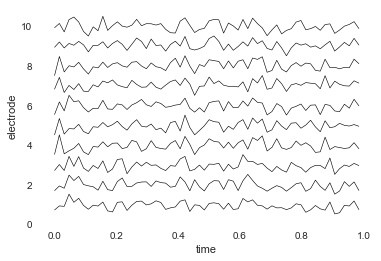

In [15]:
bo.plot_data()

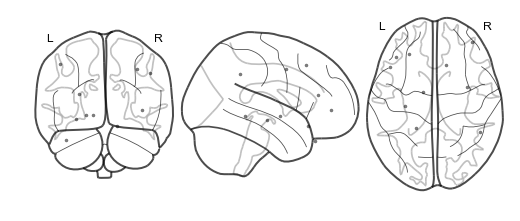

In [16]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [17]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [18]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Thu Mar  8 10:56:54 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [19]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [20]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [21]:
locs = bo.get_locs()

## `bo.get_slice()`
This method allows you to slice out time and locations from the brain object, and returns a brain object. This can occur in place if you set the flag `inplace=True`.

In [22]:
bo_slice = bo.get_slice(sample_inds=None, loc_inds=None, inplace=False)

## `bo.resample()`
This method allows you resample a brain object in place. 

In [23]:
bo.resample(resample_rate=None)

## `bo.plot_data()`

This method normalizes and plots data from brain object:

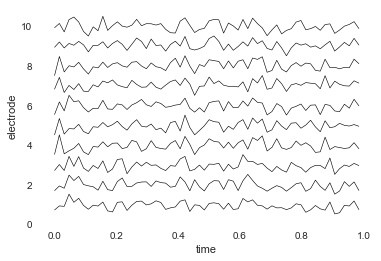

In [24]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

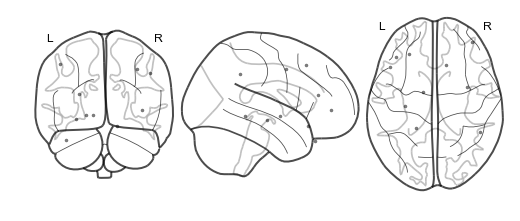

In [25]:
bo.plot_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [26]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument. If no template is specified, it will use the gray matter masked MNI 152 brain downsampled to 6mm.  

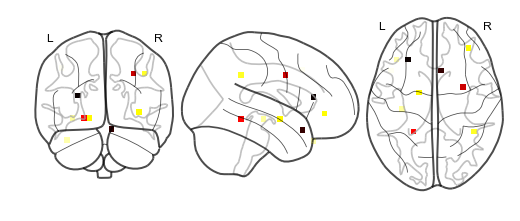

In [27]:
# convert to nifti
nii = bo.to_nii()

# plot first timepoint
nii.plot_glass_brain()

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template and resolution
# nii = bo.to_nii(template='/path/to/nifti/file.nii', vox_size=20)